In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load The Data

In [ ]:
# Load the data
ratings = pd.read_csv('ratings.csv')  # User ratings
movies = pd.read_csv('movies.csv')    # Movie details

In [ ]:
# Merge ratings and movies data
movie_ratings = pd.merge(ratings, movies, on='movieId')

In [ ]:
# Create a user-movie matrix
user_movie_matrix = movie_ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)

In [ ]:
movie_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

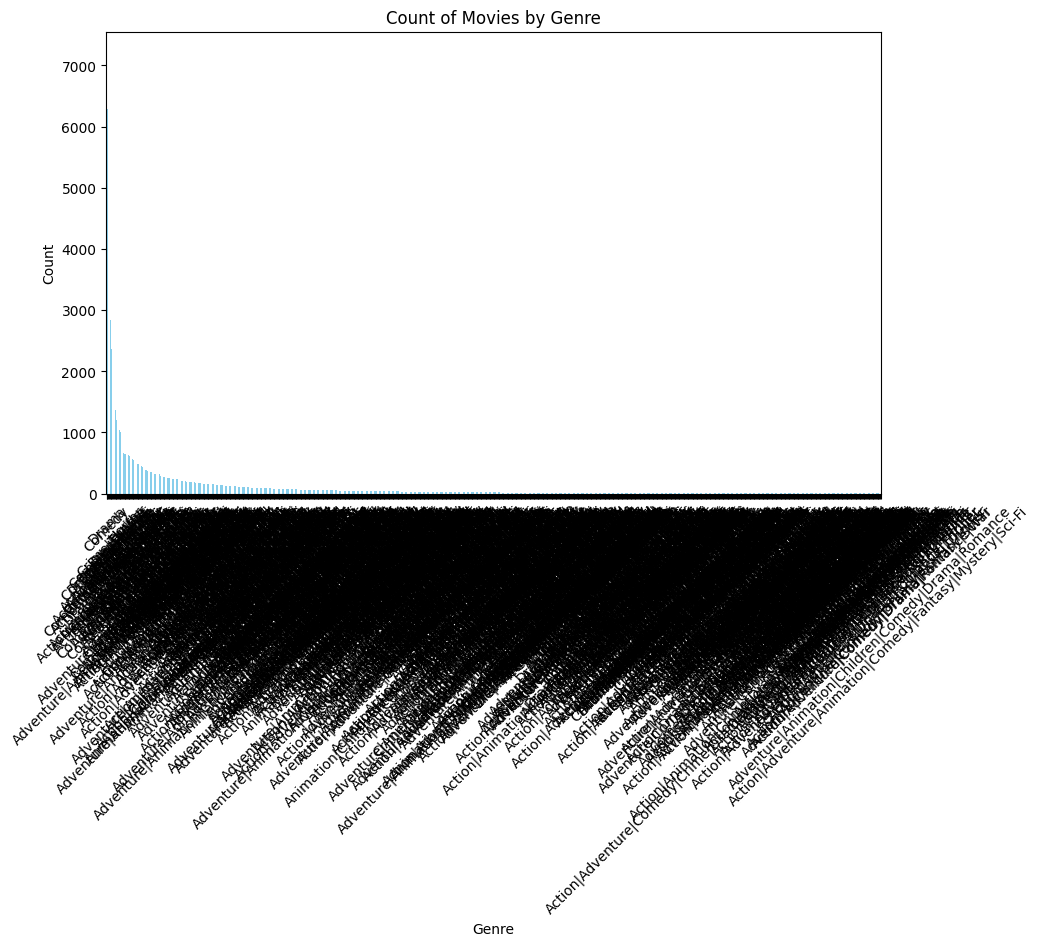

In [ ]:
# Bar chart for categorical columns
plt.figure(figsize=(10, 6))
movie_ratings['genres'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



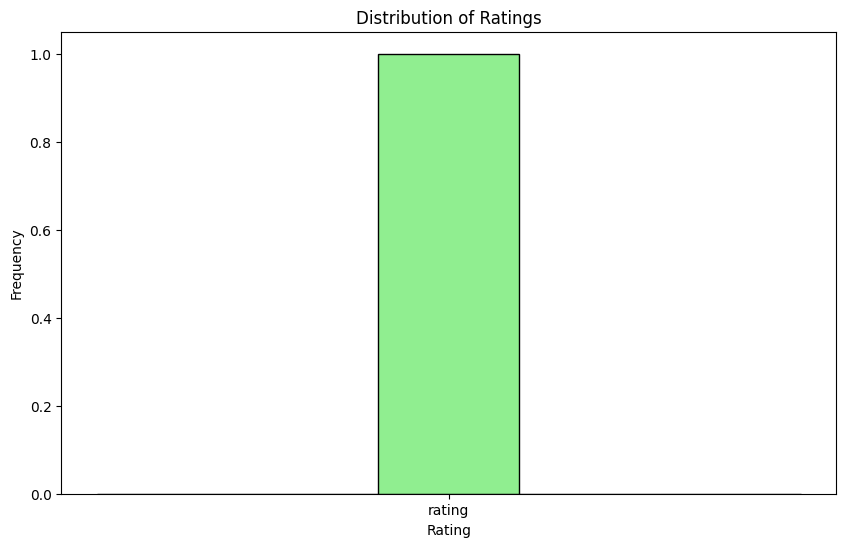

In [ ]:
# Histogram for numerical columns
plt.figure(figsize=(10, 6))
plt.hist(['rating'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

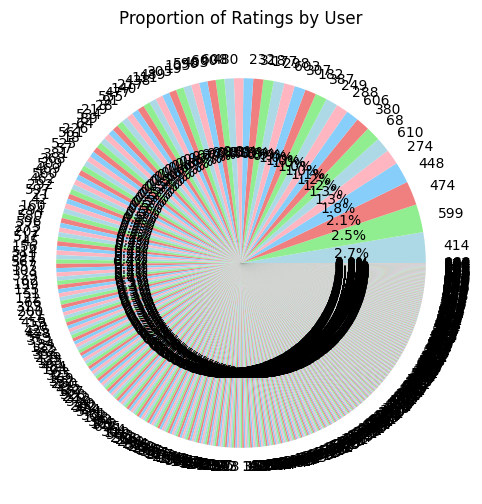

In [ ]:
# Pie chart for categorical columns
plt.figure(figsize=(10, 6))
movie_ratings['userId'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Proportion of Ratings by User')
plt.ylabel('')
plt.show()

# EDA

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
movie_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
movie_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Similarity

In [ ]:
# Calculate cosine similarity between movies
movie_similarity = cosine_similarity(user_movie_matrix.T)

# FUNCTION

In [ ]:
# Function to recommend movies for a user
def recommend_movies(user_id, num_recommendations=5):
    user_ratings = user_movie_matrix.loc[user_id]
    similar_movies = pd.Series(0, index=user_movie_matrix.columns)

    for movie_title, rating in user_ratings.items():  # Corrected iteration
        if movie_title in movie_similarity:  # Check if the movie exists in the similarity matrix
            similar_scores = movie_similarity[movie_title] * rating
            similar_movies += similar_scores

    similar_movies = similar_movies.sort_values(ascending=False)
    recommended_movies = similar_movies[1:num_recommendations+1]  # Exclude already rated movies
    return recommended_movies



In [ ]:
movie_ratings['userId']

0           1
1           5
2           7
3          15
4          17
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64

# EXAMPLE

In [ ]:
# Example: Recommend movies for user with ID 1
user_id = 1
recommended_movies = recommend_movies(user_id)
print("Recommended movies for user", user_id)
print(recommended_movies)

Recommended movies for user 1
title
Parasyte: Part 2 (2015)     0
Parent Trap, The (1998)     0
Parental Guidance (2012)    0
Parenthood (1989)           0
Paris Is Burning (1990)     0
dtype: int64
